In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def show(img):
    if img.ndim == 2:
        plt.imshow(img, cmap='gray')
    else:
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        plt.imshow(img)
    plt.show()

## 15. 傅里叶变换

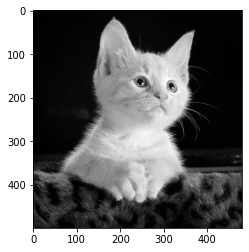

In [345]:
I  = cv.imread('pic/cat500x480.jpg', 0)
show(I)

In [127]:
f = np.fft.fft2(I)

fshift = np.fft.fftshift(f)

v = np.log(np.abs(fshift))

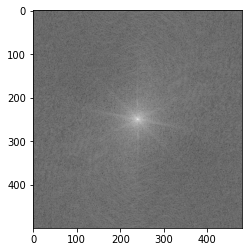

In [128]:
plt.imshow(v, cmap='gray')
plt.show()

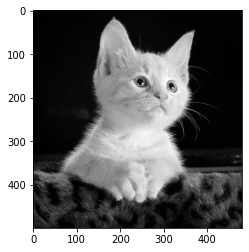

In [21]:
I2 = np.fft.ifft2(f)

I22 = np.abs(I2)

show(I22)

In [26]:
(I22.astype(np.uint8) != I).sum()

94254

In [21]:
def dft2_1(I, u, v):
    N, M = I.shape
    Re = 0.0
    Im = 0.0
    for x in range(M):
        for y in range(N):
            power = -2 * np.pi * (u*x/M + v*y/N)
            Re += I[y,x] * np.cos(power)
            Im += I[y,x] * np.sin(power)
    return Re + Im*1j

In [228]:
def dft2_2(I, u, v):
    N, M = I.shape
    
    x = np.arange(0, M, 1)
    y = np.arange(0, N, 1).reshape((N, 1))

    power = -2 * np.pi * (u*x/M + v*y/N)
    
    Re = (I * np.cos(power)).sum()
    Im = (I * np.sin(power)).sum()
    return Re + Im*1j

In [344]:
I = np.ones((50,100))
I[:, :50] = 0

In [346]:
res = np.zeros((50, 100), dtype=np.complex128)
for u in range(50):
    for v in range(100):
        res[u,v] = dft2_2(I, v, u)

show(np.log(np.abs(res) + 1))

plt.plot(np.log(np.abs(res) + 1)[0, :], 'ro')
plt.show()

KeyboardInterrupt: 

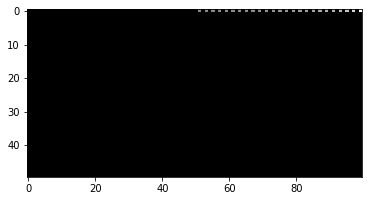

In [305]:
res2 = res.copy()
res2[:, :50] = 0 + 0*1j

show(np.log(np.abs(res2)+1))

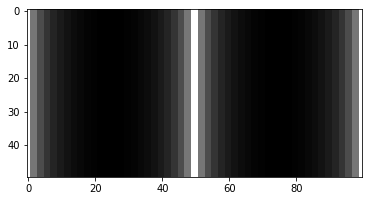

In [308]:
I2 = np.fft.ifft2(res2)

show(np.abs(I2))

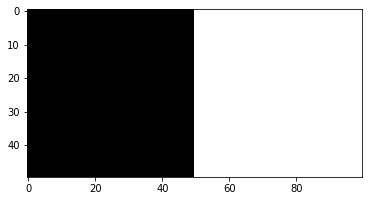

In [307]:
show(I)

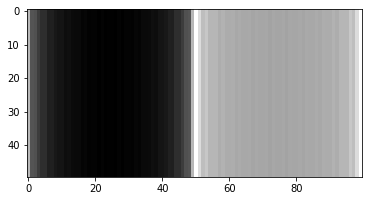

In [342]:
res2 = res.copy()
res2[:, 40:] = 0 + 0*1j

I3 = np.fft.ifft2(res2)

show(np.abs(I3))

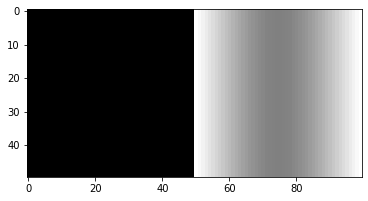

In [327]:
res2 = res.copy()
res2[:, 1] = 0 + 0*1j

I3 = np.fft.ifft2(res2)

show(np.abs(I3))

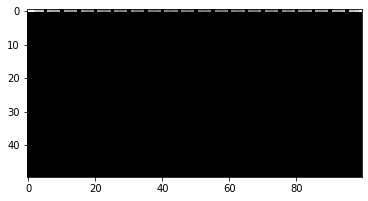

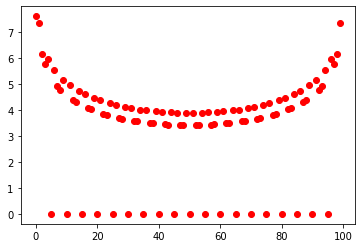

In [272]:
I = np.ones((50,100))
I[:, :30] = 0
I[:, 70:] = 0

res = np.zeros((50, 100), dtype=np.complex128)
for u in range(50):
    for v in range(100):
        res[u,v] = dft2_2(I, v, u)

show(np.log(np.abs(res) + 1))

plt.plot(np.log(np.abs(res) + 1)[0, :], 'ro')
plt.show()

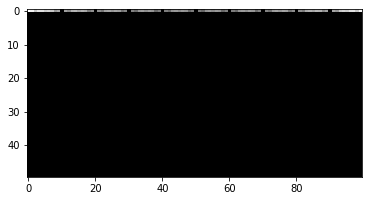

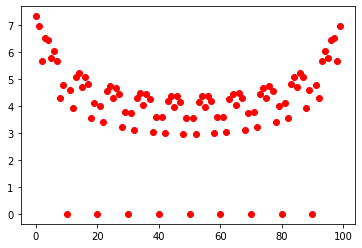

In [290]:
I = np.ones((50,100))
I[:, :30] = 0
I[:, 40:50] = 0
I[:, 70:] = 0

res = np.zeros((50, 100), dtype=np.complex128)
for u in range(50):
    for v in range(100):
        res[u,v] = dft2_2(I, v, u)

show(np.log(np.abs(res) + 1))

plt.plot(np.log(np.abs(res) + 1)[0, :], 'ro')
plt.show()

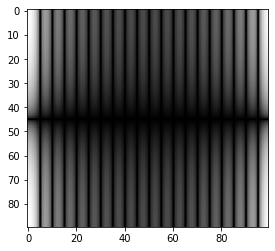

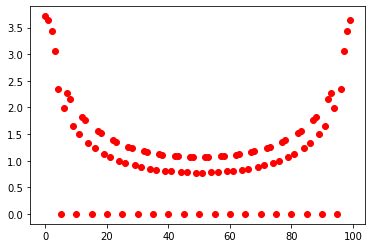

In [422]:
I = np.zeros((90,100))
I[45:47, 40:60] = 1


res = np.zeros(I.shape, dtype=np.complex128)
for u in range(I.shape[0]):
    for v in range(I.shape[1]):
        res[u,v] = dft2_2(I, v, u)

show(np.log(np.abs(res) + 1))

plt.plot(np.log(np.abs(res) + 1)[0,:], 'ro')
plt.show()

In [427]:
A2 = np.arctan2(np.real(res), np.imag(res))

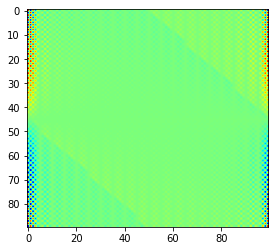

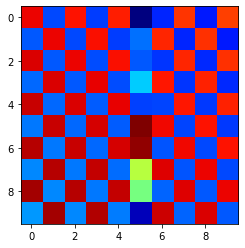

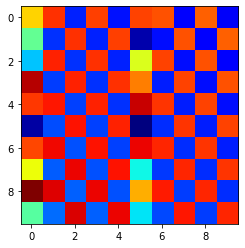

In [437]:
A = np.angle(res)

plt.imshow(np.log(np.abs(res) + 1), cmap='jet')
plt.show()

plt.imshow(A2[::10], cmap='jet')
plt.show()

plt.imshow(A2[10:, 80:], cmap='jet')
plt.show()

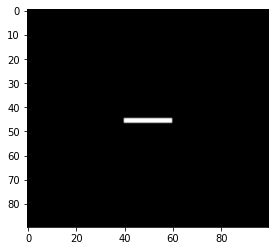

In [419]:
show(I)

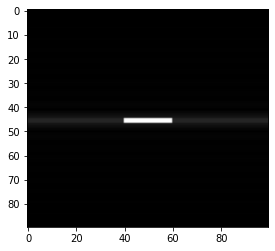

In [420]:
res2 = res.copy()
res2[20:, 0] = 0 + 0*1j
iI = np.fft.ifft2(res2)

show(np.abs(iI))

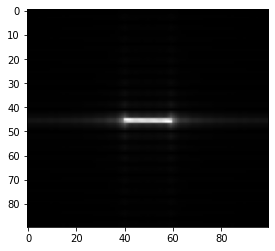

In [421]:
res2 = res.copy()
res2[20:, 20:] = 0 + 0*1j
iI = np.fft.ifft2(res2)

iI = np.abs(iI)
iI = np.round(cv.normalize(iI, None, 0, 255, cv.NORM_MINMAX))
show(iI)

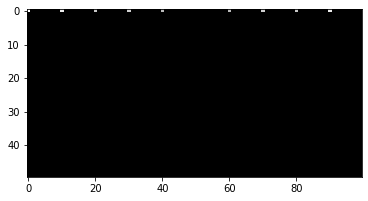

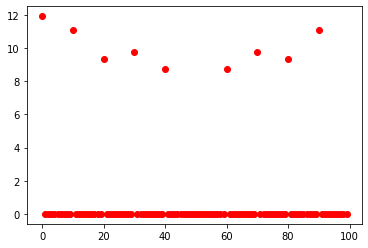

In [298]:
res = np.zeros((50, 100), dtype=np.complex128)
for u in range(50):
    for v in range(100):
        res[u,v] = dft2_2(I2, v, u)

show(np.log(np.abs(res) + 1))

plt.plot(np.log(np.abs(res) + 1)[0, :], 'ro')
plt.show()

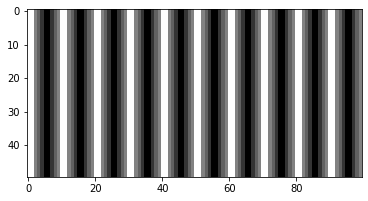

In [299]:
iI = np.fft.ifft2(res)

show(np.abs(iI))

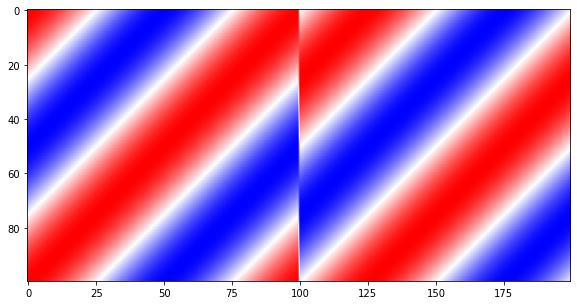

In [124]:
I = np.ones((100,100))
# I[50:, :] = 2

u, v = 99, 99

N, M = I.shape
x = np.arange(0, M, 1)
y = np.arange(0, N, 1).reshape((N, 1))
power = -2 * np.pi * (u*x/M + v*y/N)

Re = I * np.cos(power)
Im = I * np.sin(power)

plt.figure(figsize=(10,5))
plt.imshow(np.c_[Re, Im], cmap='bwr')
plt.show()

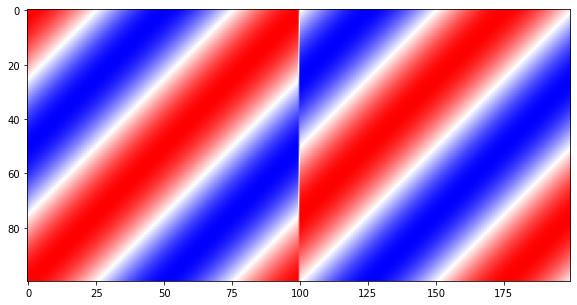

In [125]:
I = np.ones((100,100))
# I[50:, :] = 2

u, v = 1, 1

N, M = I.shape
x = np.arange(0, M, 1)
y = np.arange(0, N, 1).reshape((N, 1))
power = -2 * np.pi * (u*x/M + v*y/N)

Re = I * np.cos(power)
Im = I * np.sin(power)

plt.figure(figsize=(10,5))
plt.imshow(np.c_[Re, Im], cmap='bwr')
plt.show()

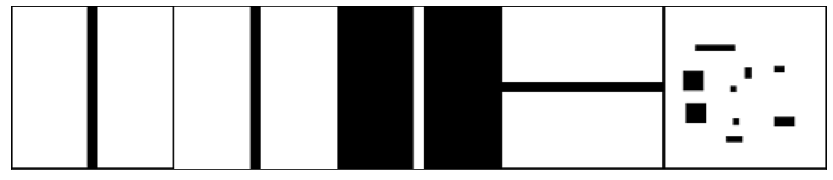

In [131]:
I1 = cv.imread('pic/fft_vbar100x100.png', 0)
I2 = cv.imread('pic/fft_vbar_no_frame100x100.png', 0)
I3 = cv.imread('pic/fft_vbar_white_bar100x100.png', 0)
I4 = cv.imread('pic/fft_hbar100x100.png', 0)
I5 = cv.imread('pic/fft_scatter100x100.png', 0)

plt.figure(figsize=(15, 3))
plt.imshow(np.c_[I1, I2, I3, I4, I5], cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

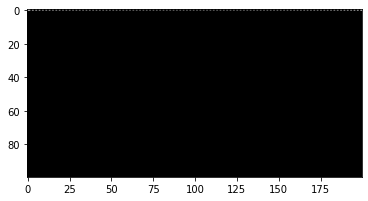

In [226]:
# I1f = np.fft.fftshift(np.fft.fft2(I1))
I1  = np.ones((100, 200))
I1[:, :100] = 0

I1f = np.fft.fft2(I1)
I1fm = np.log(np.abs(I1f) + 1)

show(I1fm)

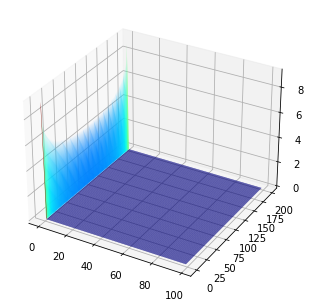

In [227]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

z = I1fm
h, w = z.shape

x,y = np.mgrid[0:h:1, 0:w:1]

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='jet',alpha = 0.8)

plt.show()

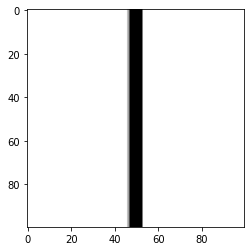

In [80]:
show(I2)

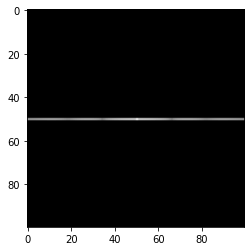

In [79]:
I2f = np.fft.fftshift(np.fft.fft2(I2))
# I2f = np.fft.fft2(I2)
I2fm = np.log(np.abs(I2f) + 1)

show(I2fm)

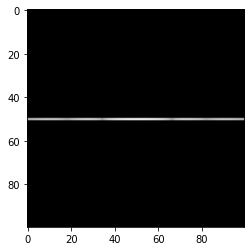

In [62]:
I3f = np.fft.fftshift(np.fft.fft2(I3))
I3fm = np.log(np.abs(I3f) + 1)

show(I3fm)

In [90]:
t = np.round(I3fm)
len(t[t>0])

100

In [ ]:
I3f = np.fft.fftshift(np.fft.fft2(I3))
I3fm = np.log(np.abs(I3f) + 1)

show(I3fm)

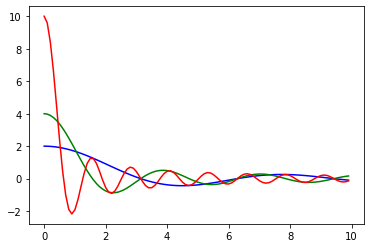

In [78]:
w = np.arange(1e-5, 10, 0.1)
a = 1.0
Fw1 = 2 * np.sin(w) / w
Fw2 = 2 * np.sin(2 * w) / w
Fw5 = 2 * np.sin(5 * w) / w

plt.plot(w, Fw1, 'b', w, Fw2, 'g', w, Fw5, 'r')
plt.show()

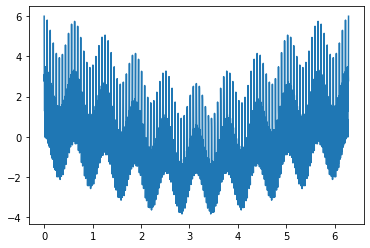

In [166]:
x = np.linspace(0, 2*np.pi, 2000)
m = np.cos(x)+np.cos(10*x)+np.cos(100*x)+np.cos(200*x)+np.cos(500*x)+np.cos(1000*x);

plt.plot(x, m)
plt.show()

In [167]:
res = np.fft.fft(m)

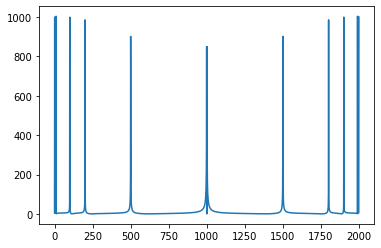

In [165]:
plt.plot(np.abs(res))
plt.show()

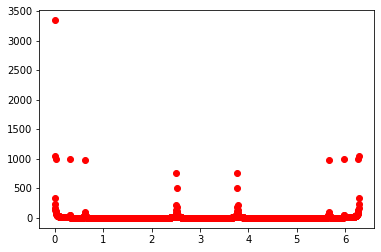

In [225]:
n = 2000
x = np.linspace(0, 2*np.pi, n)
m = np.sqrt(x) + np.cos(x)+np.cos(10*x)+np.cos(100*x)+np.cos(200*x)+np.cos(800*x);
# m =  x**2 + np.cos(10 * x)
# x = 2 * np.pi

res = np.fft.fft(m)
plt.plot(x, np.abs(res), 'ro')
plt.show()

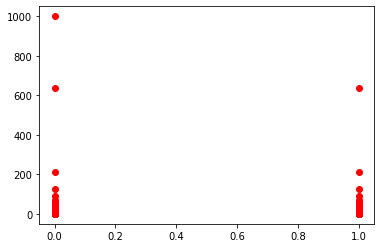

In [223]:
n = 2000
x = np.linspace(0, 2*np.pi, n)
x[:1000] = 0.0
x[1000:] = 1.0
m = x

res = np.fft.fft(m)
plt.plot(x, np.abs(res), "ro")
# plt.ylim([0, 100])
plt.show()

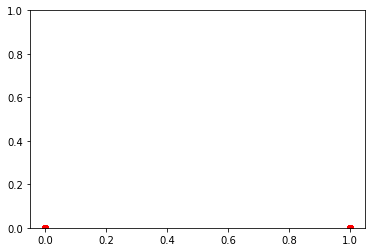

In [215]:
x = np.ones(100)
x[::2] = 0

# n = 1000
# m = np.cos(x)+np.cos(10*x)+np.cos(100*x)+np.cos(200*x)+np.cos(800*x);

# x = 2 * np.pi

res = np.fft.fft(x)
plt.plot(x, np.abs(res), 'ro')
plt.ylim([0, 1])
plt.show()

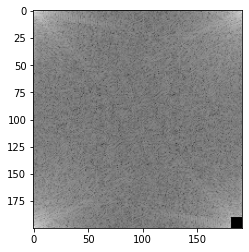

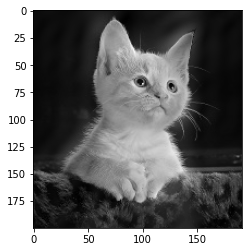

In [438]:
I = cv.imread('pic/cat_gray.jpg', 0)
F = np.fft.fft2(I)

F[-10:, -10:] = 0 + 0*1j
iF = np.abs(np.fft.ifft2(F))

show(np.log(np.abs(F) + 1))
show(iF)

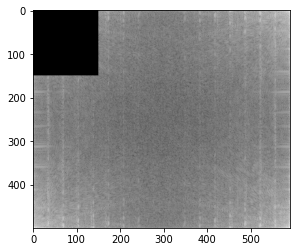

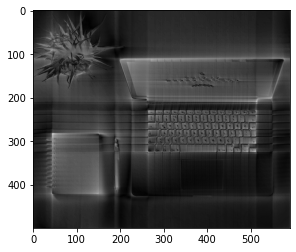

In [442]:
I = cv.imread('pic/notebook500x590.jpg', 0)
F = np.fft.fft2(I)

F[:150, :150] = 0 + 0*1j
iF = np.abs(np.fft.ifft2(F))

show(np.log(np.abs(F) + 1))
show(iF)

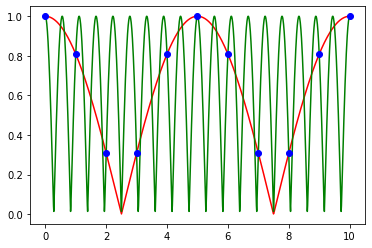

In [452]:
x = np.linspace(0, 10, 1000)
x2 = np.arange(0, 11)

y1 = np.abs(np.cos(2* 1*np.pi * x / 10))
y2 = np.abs(np.cos(2* 9*np.pi * x / 10))
yx2 = np.abs(np.cos(2* 1*np.pi * x2 / 10))

plt.plot(x, y1, 'r', x, y2, 'g', x2, yx2, 'bo')
plt.show()

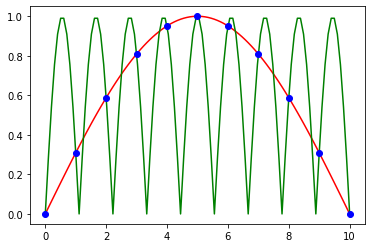

In [447]:
x = np.linspace(0, 10, 100)
x2 = np.arange(0, 11)

y1 = np.sin(1*np.pi * x / 10)
y2 = np.abs(np.sin(9*np.pi * x / 10))
yx2 = np.sin(1*np.pi * x2 / 10)

plt.plot(x, y1, 'r', x, y2, 'g', x2, yx2, 'bo')
plt.show()

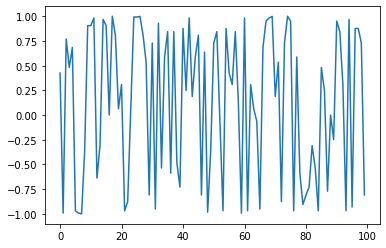

In [68]:
M = 100
x = np.random.randint(M, size=M)

xx = np.linspace(0, M, 10*M)

u = 1
P1 = np.exp(-2j * np.pi * u * x / M)

u = 99
P2 = np.exp(-2j * np.pi * u * x / M)

plt.plot(np.real(P1))
plt.show()

[]

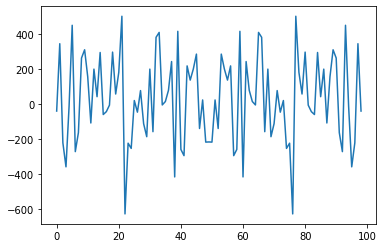

In [70]:
F = np.fft.fft(x)

plt.plot(np.real(F[1:]))
plt.plot()

In [71]:
A = np.abs(F)

In [76]:
A[1], A[50], A[51], A[2], A[52], A[99]

(43.64857517692093,
 215.00000000000003,
 252.93198338114402,
 351.29875723008325,
 73.17534430134046,
 43.648575176920964)

In [73]:
A[2], A[52]

(351.29875723008325, 73.17534430134046)

In [63]:
I = cv.imread('pic/notebook500x590.jpg', 0)
I = cv.resize(I, (100,100))
F = np.fft.fft2(I)
A = np.abs(F)

In [64]:
A[0,1], A[0,99], A[0, 49]

(74116.60729532194, 74116.60729532194, 6417.450992325528)

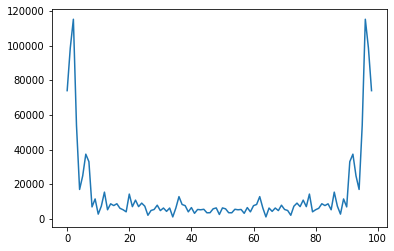

In [65]:
plt.plot(A[0,1:])
plt.show()